In [1]:
library("readxl")
library("SNPassoc")
library(dplyr)

# xls files
my_data <- read_excel("./data/data_Ali.xlsx")

Registered S3 method overwritten by 'SNPassoc':
  method            from       
  summary.haplo.glm haplo.stats


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# my_data

In [3]:
data(my_data, package = "SNPassoc")
# str(my_data, list.len=9)

Warning message in data(my_data, package = "SNPassoc"):
“data set ‘my_data’ not found”


In [4]:
idx <- grep("^rs", colnames(my_data))
my_data.s <- setupSNP(data=my_data, colSNPs=idx, sep="")

In [5]:
d <- summary(my_data.s, print=FALSE)

             alleles major.allele.freq HWE      missing (%)
rs9465871    T/C      71.1             0.058810 0          
rs17059668   C/G      73.8             0.315682 0          
rs10401969   T/C      93.1             1.000000 0          
rs2281727    A/G      72.9             0.324363 0          
rs12628032   C/T      70.5             0.352599 0          
rs10883903   A/G      70.8             0.711451 0          
rs138535227  T/C      99.7             1.000000 0          
rs2156552    T/A      83.1             0.786387 0          
rs11154027   C/T      64.5             0.611499 0          
rs2980853    A/C      57.8             0.429048 0          
rs6565653    G/T      75.9             0.529749 0          
rs13003675   C/T      63.6             0.183250 0          
rs78627331   A/C      99.1             1.000000 0          
rs13107325   C/T      98.2             1.000000 0          
rs1207709473 G       100.0             -        0          
rs1374910    C/T      90.1             0

In [6]:
write.csv(d, "./data/R_stat.csv", row.names=TRUE)

## With HWE


In [7]:
# plotMissing(my_data.s, print.labels.SNPs = FALSE)

In [8]:
hwe <- tableHWE(my_data.s)
# hwe

In [9]:
hwe2 <- tableHWE(my_data.s, Status)
# hwe2
write.csv(hwe2, "./data/hwe.csv", row.names=TRUE)

In [10]:
# snpNHWE <- hwe2[,1]>0.05 & hwe2[,2]<0.05
# rownames(hwe2)[snpNHWE]
# hwe2[snpNHWE,]

snps.ok <- rownames(hwe2)[hwe2[,1]>=0.01]

In [11]:

pos <- which(colnames(my_data)%in%snps.ok, useNames = FALSE)
my_data.s <- setupSNP(my_data, pos, sep="")
# association(Status ~ rs225131, data = my_data.s)

In [12]:
ans <- WGassociation(Status, data=my_data.s)
head(ans)

,comments,codominant,dominant,recessive,overdominant,log-additive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs9465871,NA,0.04141737,0.01565329,0.11220293,0.1228792,0.0119050
rs17059668,NA,0.63679039,0.82895239,0.34455545,0.7671198,0.5784796
rs2281727,NA,0.35685951,0.44845494,0.39617615,0.1849502,0.8487042
rs12628032,NA,0.25627559,0.59056088,0.09921212,0.5944464,0.2386101
rs10883903,NA,0.91282851,0.78287011,0.69180602,0.9573349,0.7005120
rs2156552,NA,0.21725269,0.50435090,0.08214310,0.9727048,0.2416298


Warning message:
“Use of `dat$SNP` is discouraged.
ℹ Use `SNP` instead.”
Warning message:
“Use of `dat$p.value` is discouraged.
ℹ Use `p.value` instead.”


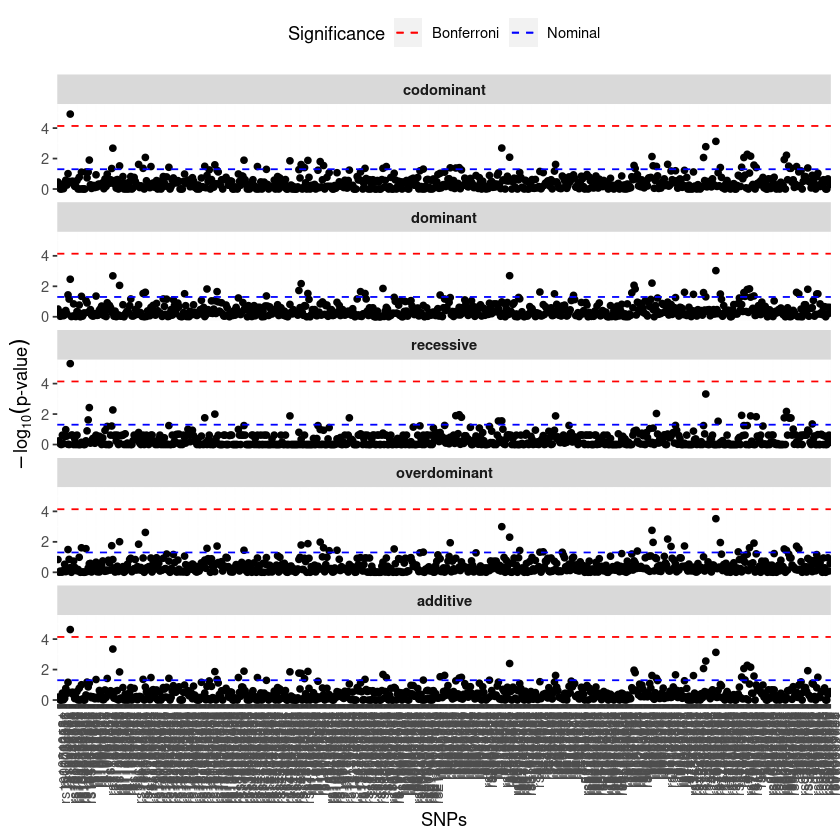

In [13]:
plot(ans)

In [14]:
# ans

In [15]:
write.csv(ans[order(ans$codominant), ], "./data/R_stat_p.csv", row.names=TRUE)

In [16]:
ans <- ans[order(ans$codominant), ]
ans <- ans[ans$codominant < 0.05, ]

rows = rownames(ans)

In [17]:
snp_list <- rows
results <- list()  # Initialize a list to store results for each SNP

for (snp in snp_list) {
  formula <- as.formula(paste("Status ~", snp))
  result <- association(formula, data = my_data.s)
  results[[snp]] <- result
}

In [18]:
file_path <- './data/confidence.txt'

# Capture the printed output
output <- capture.output(print(results))

# Write the captured output to a text file
writeLines(output, con = file_path)


## Without HWE need furter work to be done


In [19]:
# pos <- which(colnames(my_data.s), useNames = FALSE)
# pos

In [20]:
# pos <- colnames(my_data.s)

In [21]:
# pos

In [22]:

# pos <- which(colnames(my_data.s), useNames = FALSE)
# my_data.s <- setupSNP(my_data, pos, sep="")
# association(Status ~ rs225131, data = my_data.s)

In [23]:
# Status

In [ ]:
# Splitting the SNP subset dataframe into smaller subsets
num_snps <- ncol(my_data.s)
subset_size <- 2000
num_subsets <- ceiling(num_snps / subset_size)

subset_list <- vector("list", num_subsets)
for (i in 1:num_subsets) {
  start <- (i - 1) * subset_size + 1
  end <- min(i * subset_size, num_snps)
  subset_list[[i]] <- cbind(my_data[["Status"]], my_data.s[, start:end])
}

# Running WGassociation on each subset
result_list <- vector("list", num_subsets)
for (i in 1:num_subsets) {
  result_list[[i]] <- WGassociation(subset_list[[i]][, -1], data = subset_list[[i]][, 1])
}

# Combining the results
combined_result <- do.call("rbind", result_list)


ERROR: Error in WGassociation(subset_list[[i]][, -1], data = subset_list[[i]][, : data must be an object of class 'setupSNP'


In [ ]:
resuols <- WGassociation(Status, my_data.s[, 1:1000])

In [27]:
# resuols[order(resuols$codominant), ]


In [ ]:
resuols[order(resuols[, 2]), ]

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


ERROR: Error in `[.WGassociation`(x, !nas): Undefined rows selected


In [ ]:
ans <- WGassociation(Status, data=my_data.s)
head(ans)

ERROR: Error in WGassociation(Status, data = my_data.s): Select only one genetic model when more than 2000 SNPs are analyzed 
 or use 'scanWGassociation' function


In [26]:
# plot(ans)

In [24]:
# ans

In [25]:
# write.csv(ans, "./data/R_stat_p.csv", row.names=TRUE)

In [ ]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.10.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_CA.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_CA.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_CA.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_CA.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] SNPassoc_2.1-0 readxl_1.4.2  

loaded via a namespace (and not attached):
 [1] httr_1.4.5         arsenal_3.6.3      tidyr_1.3.0        jsonlite_1.8.4    
 [5] viridisLite_0.4.1  splines_4.1.2      Formula_1.2-5      cellranger_1.1.0  
 [9] pillar_1.9.0       ba